In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load
import time

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_train, X_test, y_train, y_test = load('classification_data.joblib')
models_trees = load('trees.joblib')
models_knn = load('kNeighbors.joblib')

In [4]:
models_trees

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(max_depth=11, min_samples_leaf=4, random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(criterion='entropy', random_state=42)]

In [5]:
models_knn

[KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')]

In [6]:
models = models_trees + models_knn
models

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(max_depth=11, min_samples_leaf=4, random_state=42),
 RandomForestClassifier(random_state=42),
 RandomForestClassifier(criterion='entropy', random_state=42),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=20, p=1, weights='distance')]

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [8]:
def model_info(y_real_train, y_pred_train, y_real_test, y_pred_test):
    # izveštaj mera kvaliteta
    train_report = classification_report(y_real_train, y_pred_train)
    test_report = classification_report(y_real_test, y_pred_test)

    # stilizacija i prikaz teksta za HTML prikaz
    tab_indentation = "&emsp;&emsp;&emsp;"  
    html_output = f"<div style='font-weight:bold; color:blue; text-align: center;'>Train Data:{tab_indentation}Test Data:</div>"
    display(HTML(html_output))

    # priprema izveštaja
    train_report_lines = train_report.split('\n')
    test_report_lines = test_report.split('\n')
  
    # povezivanje linija trening i test izveštaja jedno pored drugog i ispis
    combined_report = np.array(["{:<57} | {}".format(train_line, test_line) for train_line, test_line in zip(train_report_lines, test_report_lines)])
    for line in combined_report:
        print(line)
        
    plt.show()

In [9]:
def build_model(model, X_train, X_test, y_train, y_test):
    # treniranje modela i merenje vremena
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # predviđanje modela i merenje vremena
    y_train_pred = model.predict(X_train)
    start_time = time.time()
    y_test_pred= model.predict(X_test)
    prediction_time = time.time() - start_time
    
    return model, y_train_pred, y_test_pred, training_time, prediction_time

In [10]:
y_train_preds = []
y_test_preds = []
training_times = []
prediction_times = []

for model in models:
    model, y_train_pred, y_test_pred, training_time, prediction_time = build_model(model, X_train, X_test, y_train, y_test)
    y_train_preds.append(y_train_pred)
    y_test_preds.append(y_test_pred)
    training_times.append(training_time)
    prediction_times.append(prediction_time)

## Metrike

In [11]:
from IPython.display import HTML

model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV', 'KNeighbors', 'KNeighbors CV']
for i in range(len(models)):
    print()
    
    # stilizacija teksta 
    html_output = f"<div style='font-weight:bold; font-size:20pt; color:blue; text-align: center;'>{model_names[i]}</div>"
    display(HTML(html_output))
   
    model_info(y_train, y_train_preds[i], y_test, y_test_preds[i])

    print()

              precision    recall  f1-score   support     |               precision    recall  f1-score   support
                                                          | 
          -1       1.00      1.00      1.00       268     |           -1       0.81      0.86      0.83        58
           0       1.00      1.00      1.00       334     |            0       0.81      0.84      0.82        94
           1       1.00      1.00      1.00       338     |            1       0.87      0.78      0.82        83
                                                          | 
    accuracy                           1.00       940     |     accuracy                           0.83       235
   macro avg       1.00      1.00      1.00       940     |    macro avg       0.83      0.83      0.83       235
weighted avg       1.00      1.00      1.00       940     | weighted avg       0.83      0.83      0.83       235
                                                          | 




              precision    recall  f1-score   support     |               precision    recall  f1-score   support
                                                          | 
          -1       0.86      0.93      0.89       268     |           -1       0.76      0.83      0.79        58
           0       0.89      0.86      0.88       334     |            0       0.80      0.86      0.83        94
           1       0.94      0.91      0.92       338     |            1       0.93      0.80      0.86        83
                                                          | 
    accuracy                           0.90       940     |     accuracy                           0.83       235
   macro avg       0.90      0.90      0.90       940     |    macro avg       0.83      0.83      0.83       235
weighted avg       0.90      0.90      0.90       940     | weighted avg       0.84      0.83      0.83       235
                                                          | 




              precision    recall  f1-score   support     |               precision    recall  f1-score   support
                                                          | 
          -1       1.00      1.00      1.00       268     |           -1       0.83      0.90      0.86        58
           0       1.00      1.00      1.00       334     |            0       0.83      0.84      0.84        94
           1       1.00      1.00      1.00       338     |            1       0.90      0.83      0.86        83
                                                          | 
    accuracy                           1.00       940     |     accuracy                           0.85       235
   macro avg       1.00      1.00      1.00       940     |    macro avg       0.85      0.86      0.85       235
weighted avg       1.00      1.00      1.00       940     | weighted avg       0.85      0.85      0.85       235
                                                          | 




              precision    recall  f1-score   support     |               precision    recall  f1-score   support
                                                          | 
          -1       1.00      1.00      1.00       268     |           -1       0.84      0.91      0.88        58
           0       1.00      1.00      1.00       334     |            0       0.86      0.85      0.86        94
           1       1.00      1.00      1.00       338     |            1       0.91      0.87      0.89        83
                                                          | 
    accuracy                           1.00       940     |     accuracy                           0.87       235
   macro avg       1.00      1.00      1.00       940     |    macro avg       0.87      0.88      0.87       235
weighted avg       1.00      1.00      1.00       940     | weighted avg       0.87      0.87      0.87       235
                                                          | 




              precision    recall  f1-score   support     |               precision    recall  f1-score   support
                                                          | 
          -1       0.83      0.83      0.83       268     |           -1       0.75      0.83      0.79        58
           0       0.81      0.87      0.84       334     |            0       0.79      0.82      0.81        94
           1       0.94      0.86      0.90       338     |            1       0.91      0.81      0.85        83
                                                          | 
    accuracy                           0.86       940     |     accuracy                           0.82       235
   macro avg       0.86      0.85      0.85       940     |    macro avg       0.82      0.82      0.82       235
weighted avg       0.86      0.86      0.86       940     | weighted avg       0.82      0.82      0.82       235
                                                          | 




              precision    recall  f1-score   support     |               precision    recall  f1-score   support
                                                          | 
          -1       1.00      1.00      1.00       268     |           -1       0.82      0.84      0.83        58
           0       1.00      1.00      1.00       334     |            0       0.79      0.86      0.82        94
           1       1.00      1.00      1.00       338     |            1       0.92      0.80      0.85        83
                                                          | 
    accuracy                           1.00       940     |     accuracy                           0.83       235
   macro avg       1.00      1.00      1.00       940     |    macro avg       0.84      0.83      0.83       235
weighted avg       1.00      1.00      1.00       940     | weighted avg       0.84      0.83      0.83       235
                                                          | 



In [12]:
class_names = ['-1', '0', '1'] 

# definisanje metrika
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# inicijalizacija prazne matrice metrika (dimenzije: broj metrika x broj modela)
num_metrics = len(metric_names)
num_models = len(model_names)
performance_metrics = np.zeros((num_metrics, num_models))

#računanje metrika za svaku kombinaciju metrike i modela
for i, metric_name in enumerate(metric_names):
    for j, model_name in enumerate(model_names):
        if metric_name == 'Accuracy':
            metric_value = accuracy_score(y_test, y_test_preds[j])  
        elif metric_name == 'Precision':
            metric_value = precision_score(y_test, y_test_preds[j], average = 'macro')
        elif metric_name == 'Recall':
            metric_value = recall_score(y_test, y_test_preds[j], average = 'macro')
        elif metric_name == 'F1 Score':
            metric_value = f1_score(y_test, y_test_preds[j], average = 'macro')
        
        performance_metrics[i, j] = metric_value

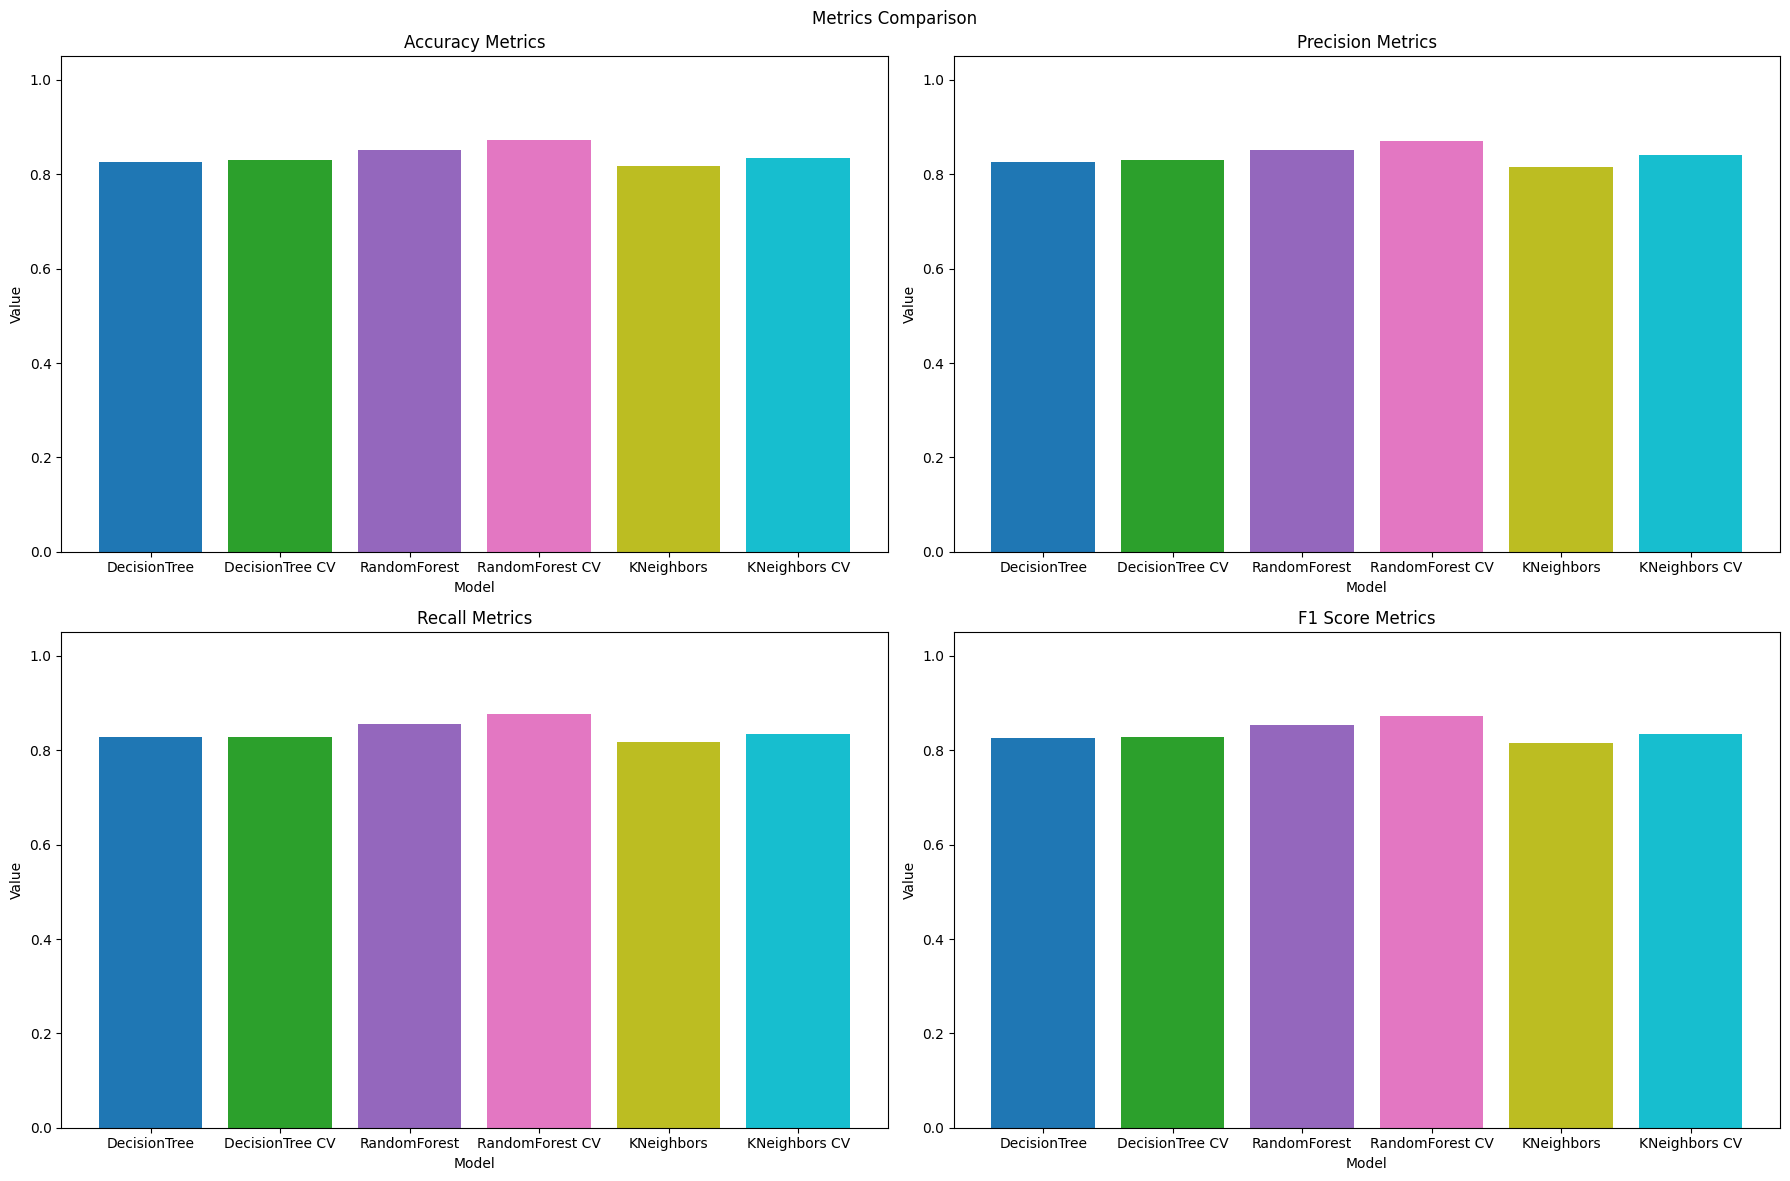

In [13]:
# kreiranje subplot-a u mreži 2x2 za svaku metriku
num_metrics = len(metric_names)
fig, axes = plt.subplots(2, 2, figsize = (18, 12))

# podešavanje boja
cmap = plt.get_cmap("tab10")
colors = cmap(np.linspace(0, 1, len(model_names)))

# prolazak kroz svaku metriku i postavljanje dijagrama na odgovarajuće mesto u mreži
for i, metric_name in enumerate(metric_names):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    ax.bar(model_names, performance_metrics[i, :], color = colors)
    ax.set_title(f'{metric_name} Metrics')
    ax.set_xlabel('Model')
    ax.set_ylabel('Value')
    ax.set_ylim(0, 1.05)  
    
plt.suptitle("Metrics Comparison")
plt.tight_layout()
plt.show()

## ROC kriva

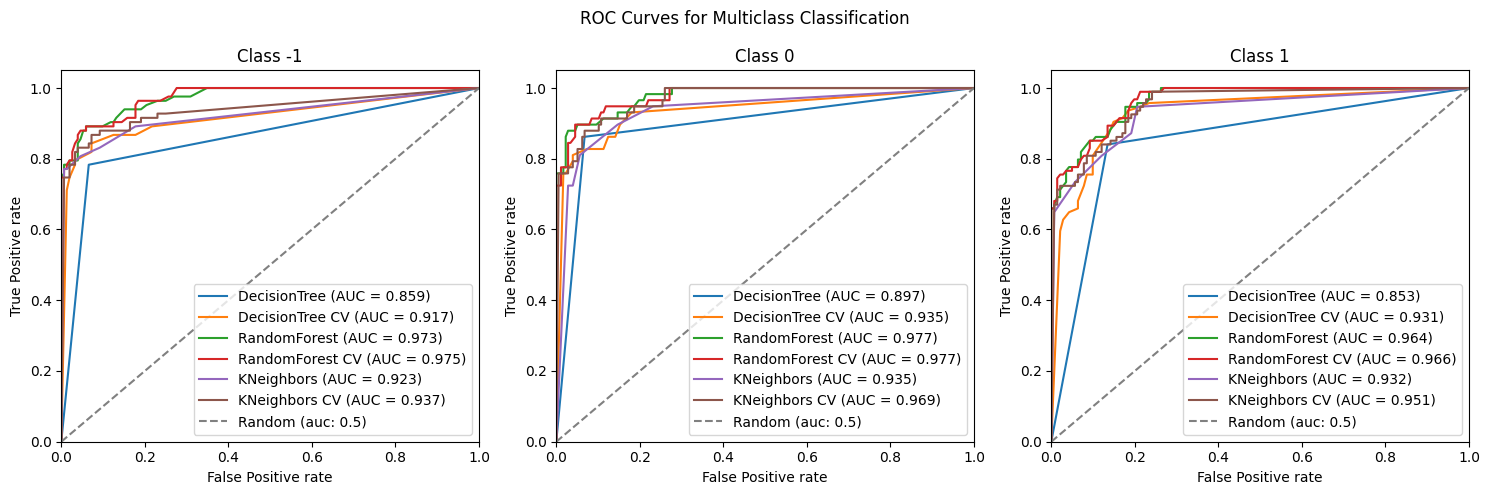

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# binarizacija ciljnih vrednosti (zbog višeklasne klasifikacije)
y_train_bin = label_binarize(y_train, classes = [-1, 0, 1])
y_test_bin = label_binarize(y_test, classes = [-1, 0, 1])

# inicijalizacija grafa
plt.figure(figsize = (15, 5))

# petlja za svaku klasu
for class_index in range(y_train_bin.shape[1]):
    # prikazivanje svake klase u odvojenom subplotu
    plt.subplot(1, y_train_bin.shape[1], class_index + 1)  
    plt.title(f'Class {class_index - 1}')
    
    # petlja za svaki model
    for model, model_name in zip(models, model_names):
        # izračunavanje vrednosti za ROC krivu i AUC
        y_pred = model.predict_proba(X_test) # Probabilities for positive class
   
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1],  y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)

        # prikazivanje ROC krive za svaki model
        plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.3f})')
        
    plt.plot([0, 1], [0, 1], label = 'Random (auc: 0.5)', color = 'grey', linestyle = '--')
    
    # podešavanje osa za svaki subplot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()

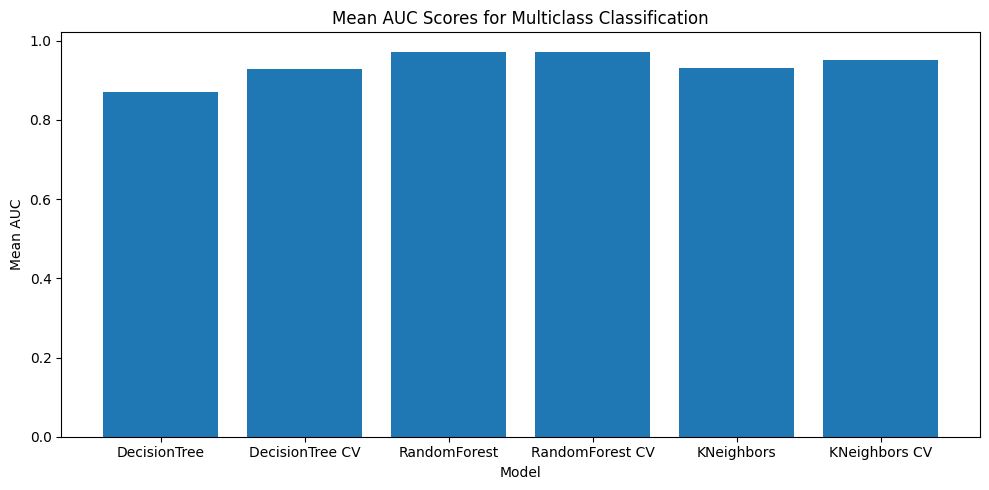

In [15]:
# izračunavanje usrednjenih AUC vrednosti za svaki model
mean_auc_scores = []

for model in models:
    y_pred = model.predict_proba(X_test)
    
    auc_scores = []
    for class_index in range(y_train_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index-1], y_pred[:, class_index-1])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
    
    mean_auc_scores.append(np.mean(auc_scores))

# vizualizacija usrednjene AUC vrednosti
plt.figure(figsize = (10, 5))
plt.bar(model_names, mean_auc_scores, color = plt.get_cmap("tab10")(0))
plt.xlabel('Model')
plt.ylabel('Mean AUC')
plt.title('Mean AUC Scores for Multiclass Classification')

plt.tight_layout()
plt.show()

## Vremenska složenost

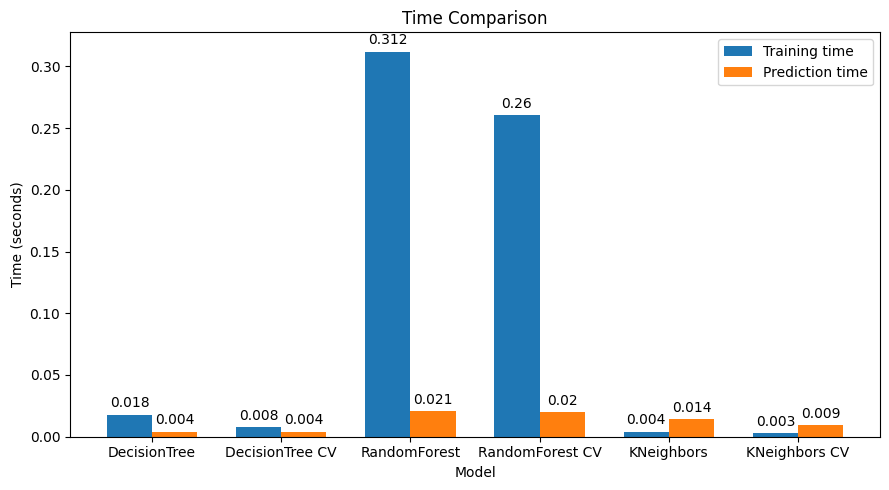

In [16]:
# Definisanje kategorija (modela) i x koordinata za svaku kategoriju
categories = model_names
x = np.arange(len(categories))

# Širina trake za bar grafikon
width = 0.35

# kreiranje grouped bar grafikona
fig, gb = plt.subplots(figsize=(9, 5))
rects1 = gb.bar(x - width/2, training_times, width, label = 'Training time', color = plt.get_cmap("tab10")(0))
rects2 = gb.bar(x + width/2, prediction_times, width, label = 'Prediction time', color = plt.get_cmap("tab10")(1))

# podešavanje oznaka, naslova i legende
gb.set_ylabel("Time (seconds)")
gb.set_xlabel("Model")
gb.set_title("Time Comparison")
gb.set_xticks(x)
gb.set_xticklabels(categories, fontsize = 10)
gb.legend()

# dodavanje vrednosti iznad traka
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        gb.annotate('{}'.format(round(height, 3)), xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3), textcoords = "offset points", ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()